In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.13.0'

In [4]:
df = pd.read_csv("Churn_modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Drop unnecessary columns and divide the data 

In [7]:
X=df.iloc[:,3:-1]
y = df.iloc[:,-1:]

In [11]:
X.head(4)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63


In [12]:
y.head(4)

,Exited
0,1
1,0
2,1
3,0


## Feature engineering

In [13]:
pd.get_dummies(X['Geography'])

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [14]:
pd.get_dummies(X['Geography'],drop_first=True)

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [16]:
pd.get_dummies(X['Gender'],drop_first=True)

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [15]:
geography = pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

### Concatinate with the original dataframe

In [17]:
X=X.drop(['Geography','Gender'],axis=1)
X.head(4)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63


In [19]:
X=pd.concat([X,geography,gender],axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


## Data Splitting

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [23]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test) 

In [25]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [24]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

## Create the NN model

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import PReLU,ReLU,LeakyReLU,ELU
from tensorflow.keras.layers import Dropout

In [95]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [96]:
classifier = Sequential()
classifier.add(Dense(units=11,activation='relu'))

classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.3))

classifier.add(Dense(units=1,activation='sigmoid'))
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')


In [97]:
model=classifier.fit(X_train,y_train,validation_split=0.33,epochs=100,callbacks=early_stopping)

Epoch 1/100
168/168 [==============================] - 1s 2ms/step - loss: 0.5573 - accuracy: 0.7923 - val_loss: 0.4895 - val_accuracy: 0.7955
Epoch 2/100
168/168 [==============================] - 0s 2ms/step - loss: 0.4943 - accuracy: 0.7968 - val_loss: 0.4576 - val_accuracy: 0.7955
Epoch 3/100
168/168 [==============================] - 0s 2ms/step - loss: 0.4732 - accuracy: 0.7975 - val_loss: 0.4468 - val_accuracy: 0.7952
Epoch 4/100
168/168 [==============================] - 0s 2ms/step - loss: 0.4612 - accuracy: 0.8044 - val_loss: 0.4414 - val_accuracy: 0.8001
Epoch 5/100
168/168 [==============================] - 0s 2ms/step - loss: 0.4581 - accuracy: 0.8063 - val_loss: 0.4379 - val_accuracy: 0.8058
Epoch 6/100
168/168 [==============================] - 0s 2ms/step - loss: 0.4487 - accuracy: 0.8046 - val_loss: 0.4344 - val_accuracy: 0.8088
Epoch 7/100
168/168 [==============================] - 0s 2ms/step - loss: 0.4465 - accuracy: 0.8112 - val_loss: 0.4307 - val_accuracy: 0.8152

Epoch 58/100
168/168 [==============================] - 0s 2ms/step - loss: 0.3559 - accuracy: 0.8494 - val_loss: 0.3670 - val_accuracy: 0.8455
Epoch 59/100
168/168 [==============================] - 0s 2ms/step - loss: 0.3588 - accuracy: 0.8492 - val_loss: 0.3667 - val_accuracy: 0.8485
Epoch 60/100
168/168 [==============================] - 0s 2ms/step - loss: 0.3548 - accuracy: 0.8520 - val_loss: 0.3669 - val_accuracy: 0.8470
Epoch 61/100
168/168 [==============================] - 0s 2ms/step - loss: 0.3581 - accuracy: 0.8531 - val_loss: 0.3650 - val_accuracy: 0.8474
Epoch 62/100
168/168 [==============================] - 0s 2ms/step - loss: 0.3569 - accuracy: 0.8494 - val_loss: 0.3662 - val_accuracy: 0.8482
Epoch 63/100
168/168 [==============================] - 0s 2ms/step - loss: 0.3605 - accuracy: 0.8505 - val_loss: 0.3662 - val_accuracy: 0.8463
Epoch 64/100
168/168 [==============================] - 0s 2ms/step - loss: 0.3647 - accuracy: 0.8485 - val_loss: 0.3650 - val_accuracy:

In [98]:
model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

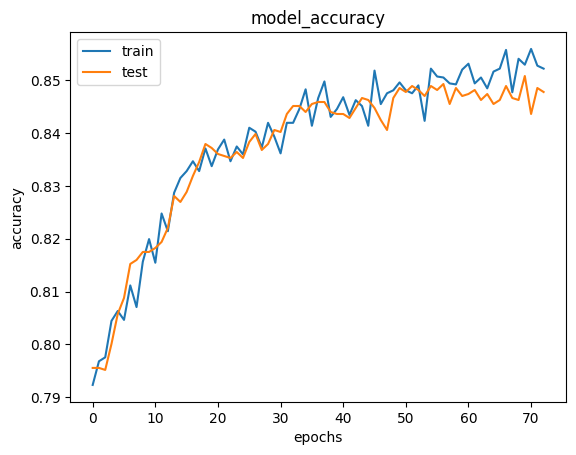

In [99]:
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model_accuracy')
plt.legend(['train','test'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

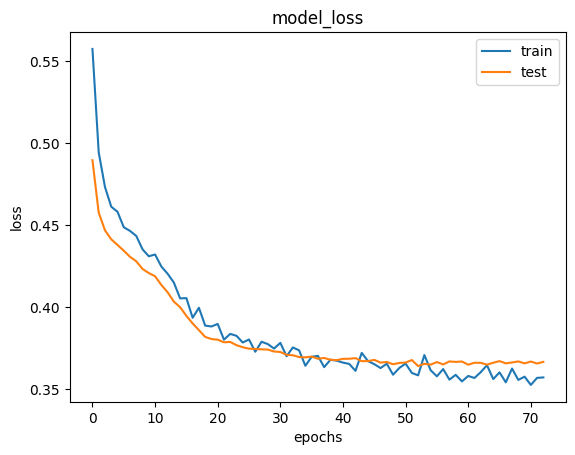

In [100]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model_loss')
plt.legend(['train','test'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

## Predictions

In [101]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 727us/step


In [102]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [103]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[1538,   57],
       [ 216,  189]], dtype=int64)

In [104]:
acc = accuracy_score(y_test,y_pred)
acc*100

86.35000000000001